In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path='/content/drive/MyDrive/Machine Learning- Session/Course Work Project/metadata.csv' #zainab's
file_path1='/content/drive/MyDrive/Machine Learning- Session/Course Work Project/metadata_test.csv' #zainab's
file_path2='/content/drive/MyDrive/Machine Learning- Session/Course Work Project/metadata_kaggle.csv' #zainab's
#file_path='/content/drive/My Drive/Machine Learning- Session/Course Work Project/metadata.csv' #kirti's
#file_path1='/content/drive/My Drive/Machine Learning- Session/Course Work Project/metadata_test.csv' #kirti's
#file_path2='/content/drive/My Drive/Machine Learning- Session/Course Work Project/metadata_kaggle.csv' #kirti's

df_metadata=pd.read_csv(file_path)
df_metadata_test=pd.read_csv(file_path1)
df_metadata_kaggle=pd.read_csv(file_path2)

Mounted at /content/drive


In [ ]:
# Extract features and target
X = df_metadata.drop(columns=['activity', 'user_snippet'])  # Features (excluding 'activity' and 'user_snippet')
y = df_metadata['activity']

In [ ]:
activity_counts = df_metadata['activity'].value_counts()
activity_counts

Walking       2452
Jogging       1951
Upstairs       702
Downstairs     606
Sitting        321
Standing       278
Name: activity, dtype: int64

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

In [ ]:
# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9516640253565769


In [ ]:
# Perform k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # Define k-fold cross-validation with 5 folds
cv_scores = cross_val_score(rf_classifier, X_train,y_train, cv=kfold)  # Perform cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.93366337 0.93960396 0.92376238 0.92864222 0.94053518]
Mean Cross-Validation Accuracy: 0.9332414212679939


In [ ]:
activity_counts = df_metadata_test['activity'].value_counts()
activity_counts

Walking       768
Jogging       689
Upstairs      238
Downstairs    174
Standing       43
Sitting        22
Name: activity, dtype: int64

In [ ]:
df_metadata_kaggle.shape[0]

2506

In [ ]:
# Extract features and target variable from the test data
X_test_data = df_metadata_test.drop(columns=['activity', 'user_snippet']) #Exclude 'user_snippet' column
y_test_data = df_metadata_test['activity']

In [ ]:
# Test the model on the test data
predictions_test = rf_classifier.predict(X_test_data)
# Compute accuracy for the test data predictions
accuracy_test = accuracy_score(y_test_data, predictions_test)
print("Accuracy on test data:", accuracy_test)

Accuracy on test data: 0.8190279214064116


In [ ]:
# Extract features from Kaggle test data
X_kaggle = df_metadata_kaggle.iloc[:, 1:]  # Exclude 'user_snippet' column

In [ ]:
#Make predictions on the Kaggle test data
predictions_kaggle = rf_classifier.predict(X_kaggle)

# Specify path within Google Drive
predictions_file_path = '/content/drive/MyDrive/Machine Learning- Session/Course Work Project/predictions RF_kaggle.csv'

# Save predictions for the Kaggle data to a CSV file
df_metadata_kaggle['prediction'] = predictions_kaggle
df_metadata_kaggle.to_csv(predictions_file_path, columns=['user_snippet', 'prediction'], index=False)

print("Predictions for Kaggle data saved to:", predictions_file_path)

Predictions for Kaggle data saved to: /content/drive/MyDrive/Machine Learning- Session/Course Work Project/predictions RF_kaggle.csv


# Hyperparameters to Increase the Predictive Power


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
     'max_depth': [ 10, 20],  # None means no maximum depth
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini'],  # Split criterion
}

In [ ]:
rf_classifier2 = RandomForestClassifier(n_estimators=100,random_state=42, class_weight='balanced')
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier2, param_grid=param_grid, cv=5, n_jobs=-1)


In [ ]:
# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_params
best_score

0.9358180337359802

In [ ]:
best_params

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

# Applying RandomForestClassifier with the best parameters



In [ ]:
best_rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42,
                                            max_depth=best_params['max_depth'],
                                              min_samples_split=best_params['min_samples_split'],
                                            min_samples_leaf=best_params['min_samples_leaf'])
best_rf_classifier.fit(X_train, y_train)

# Predict probabilities for the positive class
y_prob = best_rf_classifier.predict_proba(X_test)[:, 1]


In [ ]:
accuracy = best_rf_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9413629160063391


Cross-Validation Scores: [0.9195544554455446, 0.9381188118811881, 0.9133663366336634, 0.9417596034696406, 0.9256505576208178, 0.9096534653465347, 0.931930693069307, 0.9146039603960396, 0.929368029739777, 0.9268897149938042, 0.9108910891089109, 0.9393564356435643, 0.9146039603960396, 0.9442379182156134, 0.9330855018587361, 0.9195544554455446, 0.9381188118811881, 0.9121287128712872, 0.9306930693069307, 0.9231722428748451, 0.9108910891089109, 0.9381188118811881, 0.9071782178217822, 0.9306930693069307, 0.9219330855018587]
Mean Cross-Validation Accuracy: 0.9250220839927858


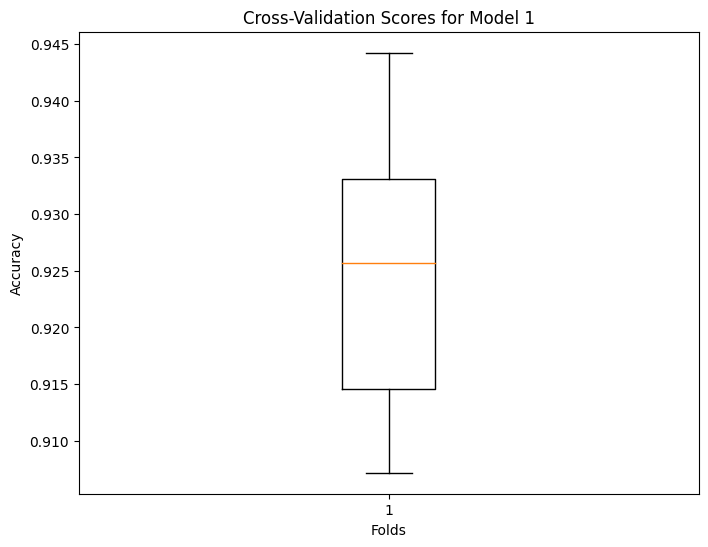

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Define k-fold cross-validation with 5 folds
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and collect scores for all folds
cv_scores = []
for train_index, val_index in kfold.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    scores = cross_val_score(best_rf_classifier, X_train_fold, y_train_fold, cv=5)  # Using cv=5 for inner cross-validation
    cv_scores.extend(scores)  # Extend the list of scores for all folds

# Print cross-validation scores and mean accuracy
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", np.mean(cv_scores))

# Plot box plot of cross-validation scores
plt.figure(figsize=(8, 6))
plt.boxplot(cv_scores)
plt.title('Cross-Validation Scores for Model 1')
plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
# Calculate accuracy on the test data
predictions = best_rf_classifier.predict(X_test_data)
accuracy = accuracy_score(y_test_data, predictions)
print("Accuracy:", accuracy)



Accuracy: 0.8231644260599793


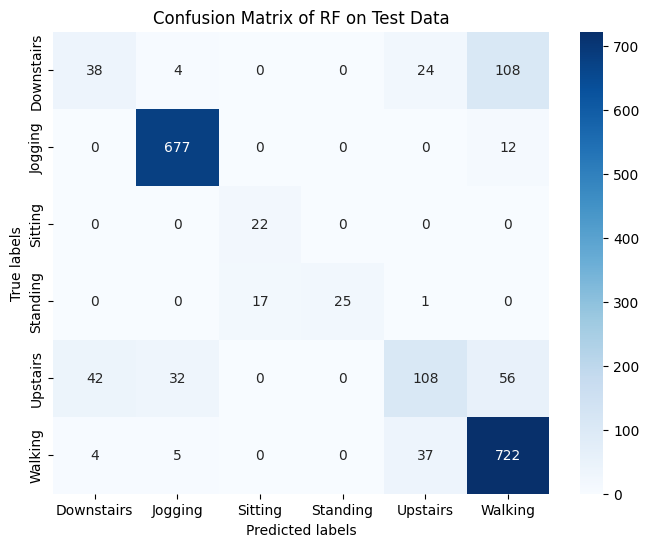

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
y_pred = best_rf_classifier.predict(X_test_data)

# Get unique class labels
unique_labels = sorted(set(y_test_data))

# Compute confusion matrix
cm = confusion_matrix(y_test_data, y_pred, labels=unique_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of RF on Test Data')
plt.show()


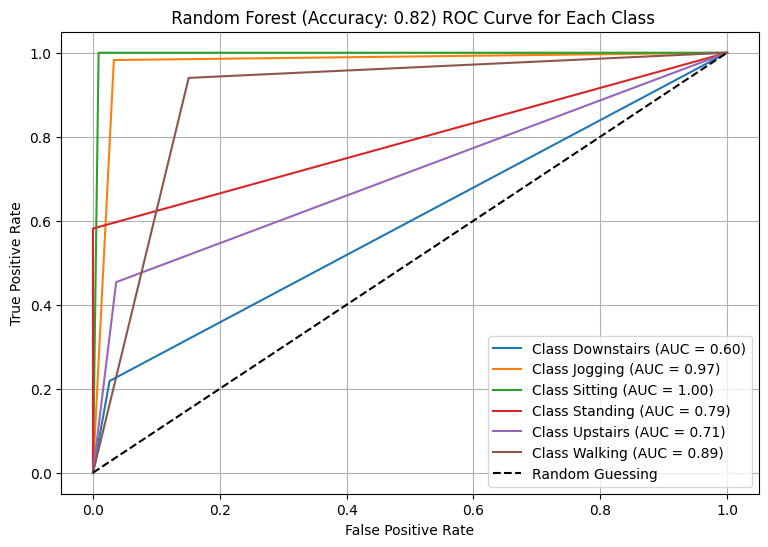

In [ ]:
from sklearn.metrics import roc_curve, auc
# Plot ROC curve for each class
plt.figure(figsize=(9, 6))
for label in unique_labels:
    fpr, tpr, _ = roc_curve(y_test_data == label, y_pred == label)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Random Forest (Accuracy: 0.82) ROC Curve for Each Class')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Class Weights

Adjust the class_weight parameter in model to give more weight to minority classes.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier with balanced class weights
rf_classifier_w = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model
rf_classifier_w.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:

# Evaluate the model
y_pred = rf_classifier_w.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9516640253565769


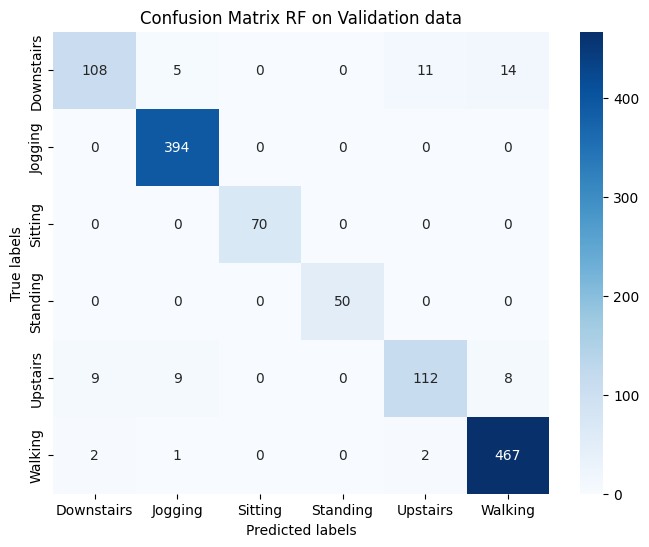

In [ ]:
# Get predictions
y_pred_w = rf_classifier_w.predict(X_test)

# Get unique class labels
unique_labels = sorted(set(y_test))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_w, labels=unique_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix RF on Validation data')
plt.show()


In [ ]:
plt.figure(figsize=(9, 6))
for label in unique_labels:
    fpr, tpr, _ = roc_curve(y_test_data == label, y_pred == label)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Random Forest (Accuracy: 0.82) ROC Curve for Each Class')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Applying Weight model on Test Dataa

In [ ]:
X_test = df_metadata_test.drop(columns=['activity', 'user_snippet'])
y_test = df_metadata_test['activity']

In [ ]:
# Calculate accuracy on the test data
predictions = rf_classifier_w.predict(X_test_data)
accuracy = accuracy_score(y_test_data, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8190279214064116


# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # Define k-fold cross-validation with 5 folds
scores = cross_val_score(rf_classifier_w, X_train,y_train, cv=kfold)
# Compute the mean and standard deviation of the cross-validation scores
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

Mean accuracy: 0.9332414212679939
Standard deviation: 0.006400997639627379


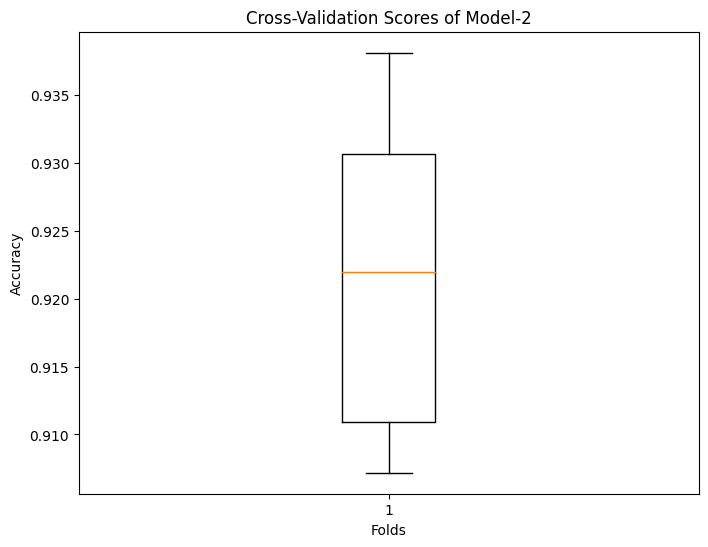

In [ ]:
# Plot box plot of cross-validation scores
plt.figure(figsize=(8, 6))
plt.boxplot(scores)
plt.title('Cross-Validation Scores of Model-2')
plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.show()

# Applying model on Kaggle dataset

In [ ]:
X_kaggle=df_metadata_kaggle.drop(columns=['user_snippet'])

In [ ]:
#Make predictions on the Kaggle test data
predictions_kaggle_best_rf = best_rf_classifier.predict(X_kaggle)

# Specify path within Google Drive
predictions_file_path = '/content/drive/MyDrive/Machine Learning- Session/Course Work Project/predictions_best_RF_kaggle.csv'

# Save predictions for the Kaggle data to a CSV file
df_metadata_kaggle['prediction'] = predictions_kaggle_best_rf
df_metadata_kaggle.to_csv(predictions_file_path, columns=['user_snippet', 'prediction'], index=False)

print("Predictions for Kaggle data saved to:", predictions_file_path)

Predictions for Kaggle data saved to: /content/drive/MyDrive/Machine Learning- Session/Course Work Project/predictions_best_RF_kaggle.csv


In [ ]:
#Make predictions on the Kaggle test data
predictions_wrf = rf_classifier_w.predict(X_kaggle)

# Specify path within Google Drive
predictions_file_path = '/content/drive/MyDrive/Machine Learning- Session/Course Work Project/predictions_weightRF_kaggle.csv'

# Save predictions for the Kaggle data to a CSV file
df_metadata_kaggle['prediction'] = predictions_wrf
df_metadata_kaggle.to_csv(predictions_file_path, columns=['user_snippet', 'prediction'], index=False)

print("Predictions for Kaggle data saved to:", predictions_file_path)

Predictions for Kaggle data saved to: /content/drive/MyDrive/Machine Learning- Session/Course Work Project/predictions_weightRF_kaggle.csv


# Ensemble Methods
Combine predictions from multiple models using ensemble methods like bagging, boosting, or stacking. This can often lead to better performance than any individual model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [ ]:

# Initialize the base classifier (e.g., Random Forest)
best_rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

# Bagging (Bootstrap Aggregating)
bagging_classifier = BaggingClassifier(base_estimator=best_rf_classifier, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)

# Evaluate bagging classifier
bagging_pred = bagging_classifier.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)
print("Bagging Accuracy:", bagging_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Accuracy: 0.8247156153050672


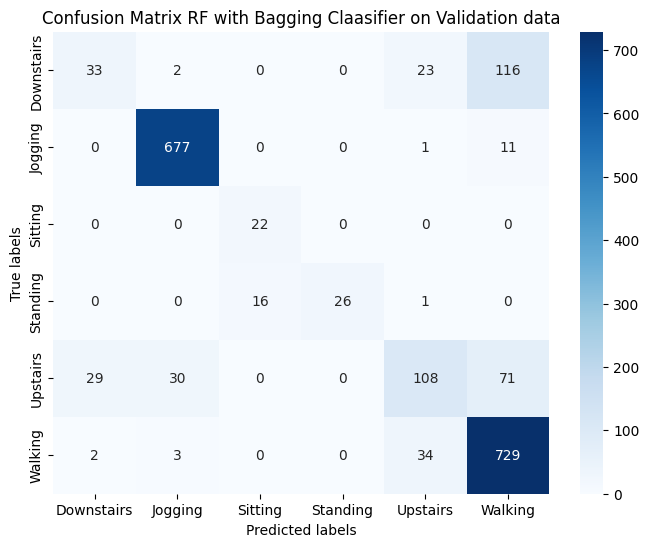

In [ ]:
# Get predictions

# Get unique class labels
unique_labels = sorted(set(y_test))

# Compute confusion matrix
cm = confusion_matrix(y_test, bagging_pred, labels=unique_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix RF with Bagging Claasifier on Validation data')
plt.show()


In [ ]:
# Predict the labels for the test data
y_pred_test3 = bagging_classifier.predict(X_test_data)
# Calculate accuracy on the test data
y_test_data = df_metadata_test['activity']
accuracy_test = accuracy_score(y_test_data, y_pred_test3)
print("Accuracy on test data:", accuracy_test)

Accuracy on test data: 0.8247156153050672


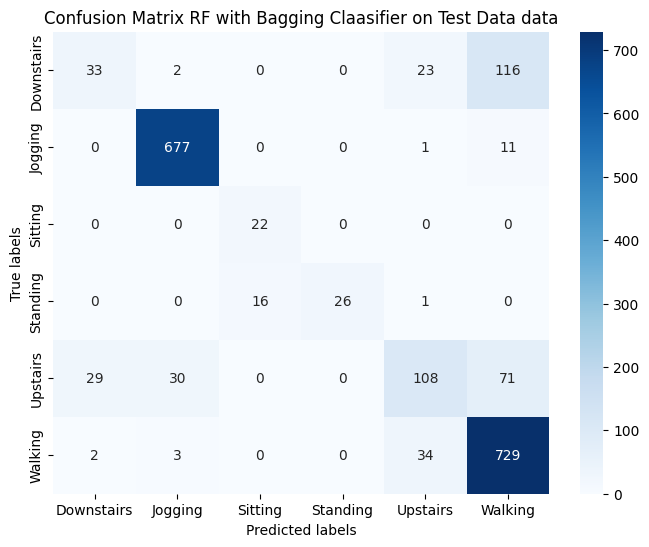

In [ ]:
# Get unique class labels
unique_labels = sorted(set(y_test_data))

# Compute confusion matrix
cm = confusion_matrix(y_test_data, y_pred_test3, labels=unique_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix RF with Bagging Claasifier on Test Data data')
plt.show()


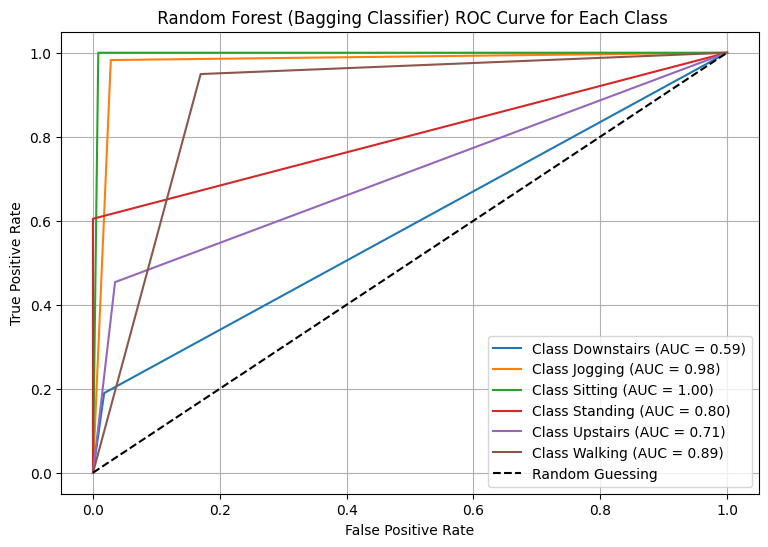

In [ ]:

# Plot ROC curve for each class
plt.figure(figsize=(9, 6))
for label in unique_labels:
    fpr, tpr, _ = roc_curve(y_test_data == label, y_pred_test3 == label)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Random Forest (Bagging Classifier) ROC Curve for Each Class')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# Boosting (AdaBoost)
adaboost_classifier = AdaBoostClassifier(base_estimator=best_rf_classifier, n_estimators=10, random_state=42)
adaboost_classifier.fit(X_train, y_train)

# Evaluate AdaBoost classifier
adaboost_pred = adaboost_classifier.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
print("AdaBoost Accuracy:", adaboost_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Accuracy: 0.8195449844881075


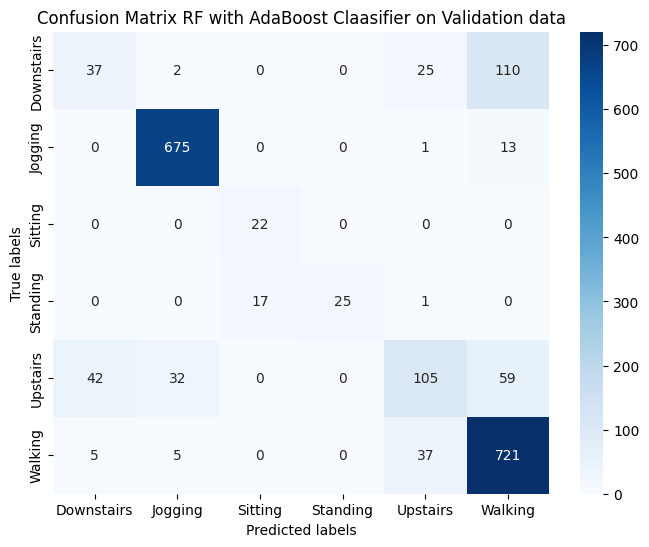

In [ ]:
# Get unique class labels
unique_labels = sorted(set(y_test))

# Compute confusion matrix
cm = confusion_matrix(y_test, adaboost_pred, labels=unique_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix RF with AdaBoost Claasifier on Validation data')
plt.show()


In [ ]:
# Predict the labels for the test data
y_pred_test4 = adaboost_classifier.predict(X_test_data)
# Calculate accuracy on the test data
y_test_data = df_metadata_test['activity']
accuracy_test = accuracy_score(y_test_data, y_pred_test4)
print("Accuracy on test data:", accuracy_test)

Accuracy on test data: 0.8195449844881075


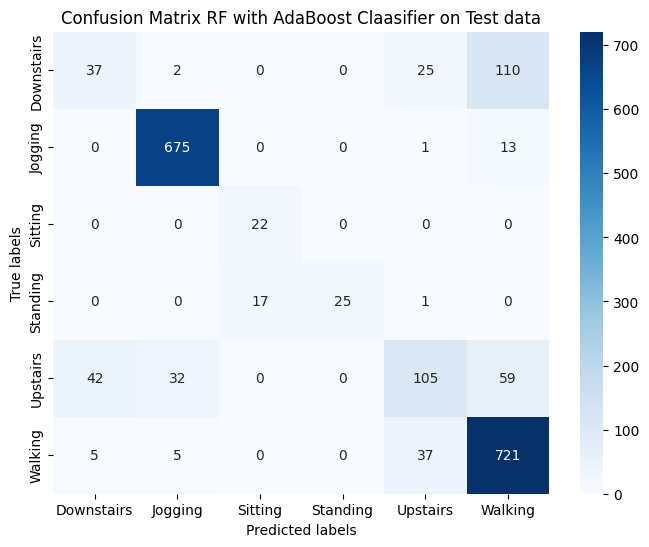

In [ ]:
unique_labels = sorted(set(y_test_data))

# Compute confusion matrix
cm = confusion_matrix(y_test_data, y_pred_test4, labels=unique_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix RF with AdaBoost Claasifier on Test data')
plt.show()


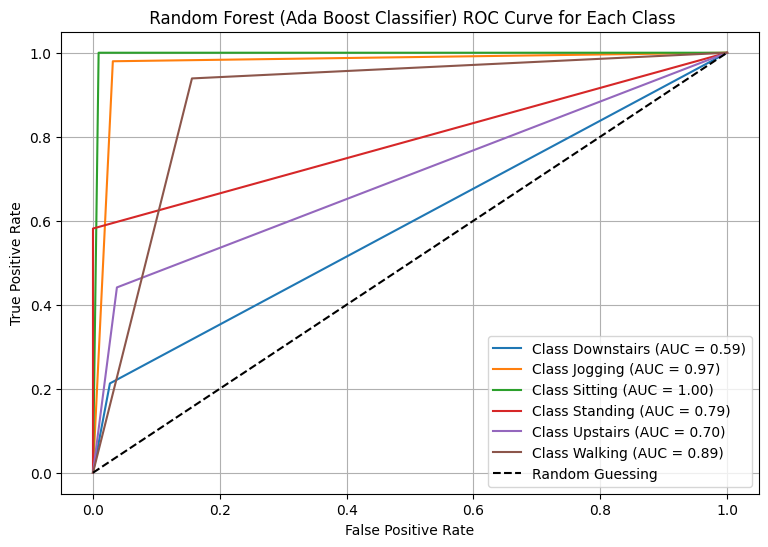

In [ ]:
# Plot ROC curve for each class
plt.figure(figsize=(9, 6))
for label in unique_labels:
    fpr, tpr, _ = roc_curve(y_test_data == label, y_pred_test4 == label)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Random Forest (Ada Boost Classifier) ROC Curve for Each Class')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
#Make predictions on the Kaggle test data
predictions_bagging_kaggle = bagging_classifier.predict(X_kaggle)

# Specify path within Google Drive
predictions_file_path = '/content/drive/MyDrive/Machine Learning- Session/Course Work Project/predictions_bagging_kaggle.csv'

# Save predictions for the Kaggle data to a CSV file
df_metadata_kaggle['prediction'] = predictions_bagging_kaggle
df_metadata_kaggle.to_csv(predictions_file_path, columns=['user_snippet', 'prediction'], index=False)

print("Predictions for Kaggle data saved to:", predictions_file_path)



Predictions for Kaggle data saved to: /content/drive/MyDrive/Machine Learning- Session/Course Work Project/predictions_bagging_kaggle.csv


In [ ]:
# Initialize the base classifier (e.g., Random Forest)
base_rf_classifier = RandomForestClassifier(random_state=42)

# Initialize the BaggingClassifier with the base classifier
bagging_classifier = BaggingClassifier(base_estimator=base_rf_classifier, random_state=42)

# Define the parameter grid to search
param_grid = {
    'base_estimator__n_estimators': [100],  # Number of estimators in the base estimator
    'max_samples': [ 1.0],             # Proportion of samples to draw from the dataset
    'max_features': [ 1.0],            # Proportion of features to draw from the dataset
    'bootstrap': [False]                  # Whether samples are drawn with replacement
}


In [ ]:

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(estimator=bagging_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42),
                                         random_state=42),
             param_grid={'base_estimator__n_estimators': [100],
                         'bootstrap': [False], 'max_features': [1.0],
                         'max_samples': [1.0]},
             scoring='accuracy')

In [ ]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'base_estimator__n_estimators': 100, 'bootstrap': False, 'max_features': 1.0, 'max_samples': 1.0}
Best Score: 0.9348277384725587


In [ ]:
# Initialize the BaggingClassifier with the best parameters
best_bagging_classifier = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=200),
                                            bootstrap=False,
                                            max_features=0.8,
                                            max_samples=1.0,
                                            random_state=42)

In [ ]:
# Train the bagging classifier on the entire training data
best_bagging_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=200),
                  bootstrap=False, max_features=0.8, random_state=42)

In [ ]:
# Evaluate the bagging classifier on the validation data
bagging_pred_test_best = best_bagging_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, bagging_pred_test_best)
print("Test Set Accuracy:", test_accuracy)

Test Set Accuracy: 0.8231644260599793


In [ ]:

cv_scores_best_bagg = cross_val_score(best_bagging_classifier, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores_best_bagg)
print("Mean Cross-Validation Accuracy:", np.mean(cv_scores_best_bagg))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Cross-Validation Scores: [0.91881188 0.94257426 0.92277228 0.94350842 0.93557978]
Mean Cross-Validation Accuracy: 0.9326493243972565


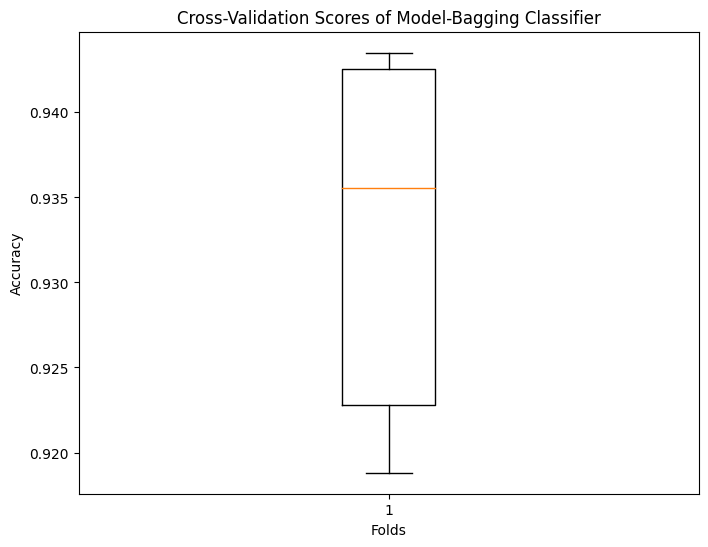

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(cv_scores_best_bagg)
plt.title('Cross-Validation Scores of Model-Bagging Classifier')
plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
bagging_pred_test_best_ = best_bagging_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, bagging_pred_test_best_)
print("Test Set Accuracy:", test_accuracy)

Test Set Accuracy: 0.8231644260599793


In [ ]:
bagging_pred_test_best_ = best_bagging_classifier.predict(X_test_data)
test_accuracy = accuracy_score(y_test_data, bagging_pred_test_best_)
print("Test Set Accuracy:", test_accuracy)

Test Set Accuracy: 0.8231644260599793


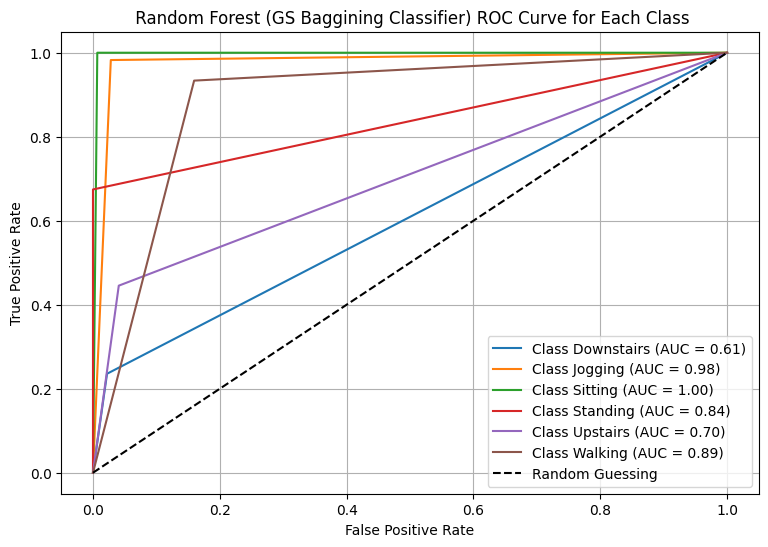

In [ ]:
plt.figure(figsize=(9, 6))
for label in unique_labels:
    fpr, tpr, _ = roc_curve(y_test_data == label, bagging_pred_test_best_ == label)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Random Forest (GS Baggining Classifier) ROC Curve for Each Class')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()